In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./datasets/Dry_Bean_Dataset.csv')
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [3]:
df.shape

(13611, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(68)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [9]:
df.describe().T

count          mean           std           min  \
Area             13543.0  53048.460385  29392.438324  20420.000000   
Perimeter        13543.0    854.993406    214.722684    524.736000   
MajorAxisLength  13543.0    319.895602     85.809260    183.601165   
MinorAxisLength  13543.0    202.365321     45.051632    122.512653   
AspectRation     13543.0      1.581075      0.245245      1.024868   
Eccentricity     13543.0      0.750315      0.091858      0.218951   
ConvexArea       13543.0  53767.986709  29844.248525  20684.000000   
EquivDiameter    13543.0    253.034094     59.307709    161.243764   
Extent           13543.0      0.749829      0.048939      0.555315   
Solidity         13543.0      0.987152      0.004650      0.919246   
roundness        13543.0      0.873671      0.059393      0.489618   
Compactness      13543.0      0.800352      0.061464      0.640577   
ShapeFactor1     13543.0      0.006561      0.001130      0.002778   
ShapeFactor2     13543.0      0.001719      0.000595      0.000564   
ShapeFactor3     13543.0      0.644341      0.098653      0.410339   
ShapeFactor4     13543.0      0.995078      0.004347      0.947687   

                          25%           50%           75%            max  
Area             36282.500000  44580.000000  61382.000000  254616.000000  
Perimeter          703.230000    793.896000    977.146500    1985.370000  
MajorAxisLength    253.086806    296.404589    376.312489     738.860154  
MinorAxisLength    175.886357    192.491117    217.245403     460.198497  
AspectRation         1.430662      1.549860      1.703916       2.430306  
Eccentricity         0.715144      0.763997      0.809671       0.911423  
ConvexArea       36673.000000  45122.000000  62360.000000  263261.000000  
EquivDiameter      214.933277    238.245711    279.560351     569.374358  
Extent               0.718735      0.759903      0.786849       0.866195  
Solidity             0.985678      0.988288      0.990019       0.994677  
roundness            0.833410      0.883490      0.917031       0.990685  
Compactness          0.763228      0.801514      0.834470       0.987303  
ShapeFactor1         0.005893      0.006643      0.007270       0.010451  
ShapeFactor2         0.001158      0.001700      0.002173       0.003665  
ShapeFactor3         0.582517      0.642424      0.696341       0.974767  
ShapeFactor4         0.993720      0.996393      0.997891       0.999733

# Univarite Analysis

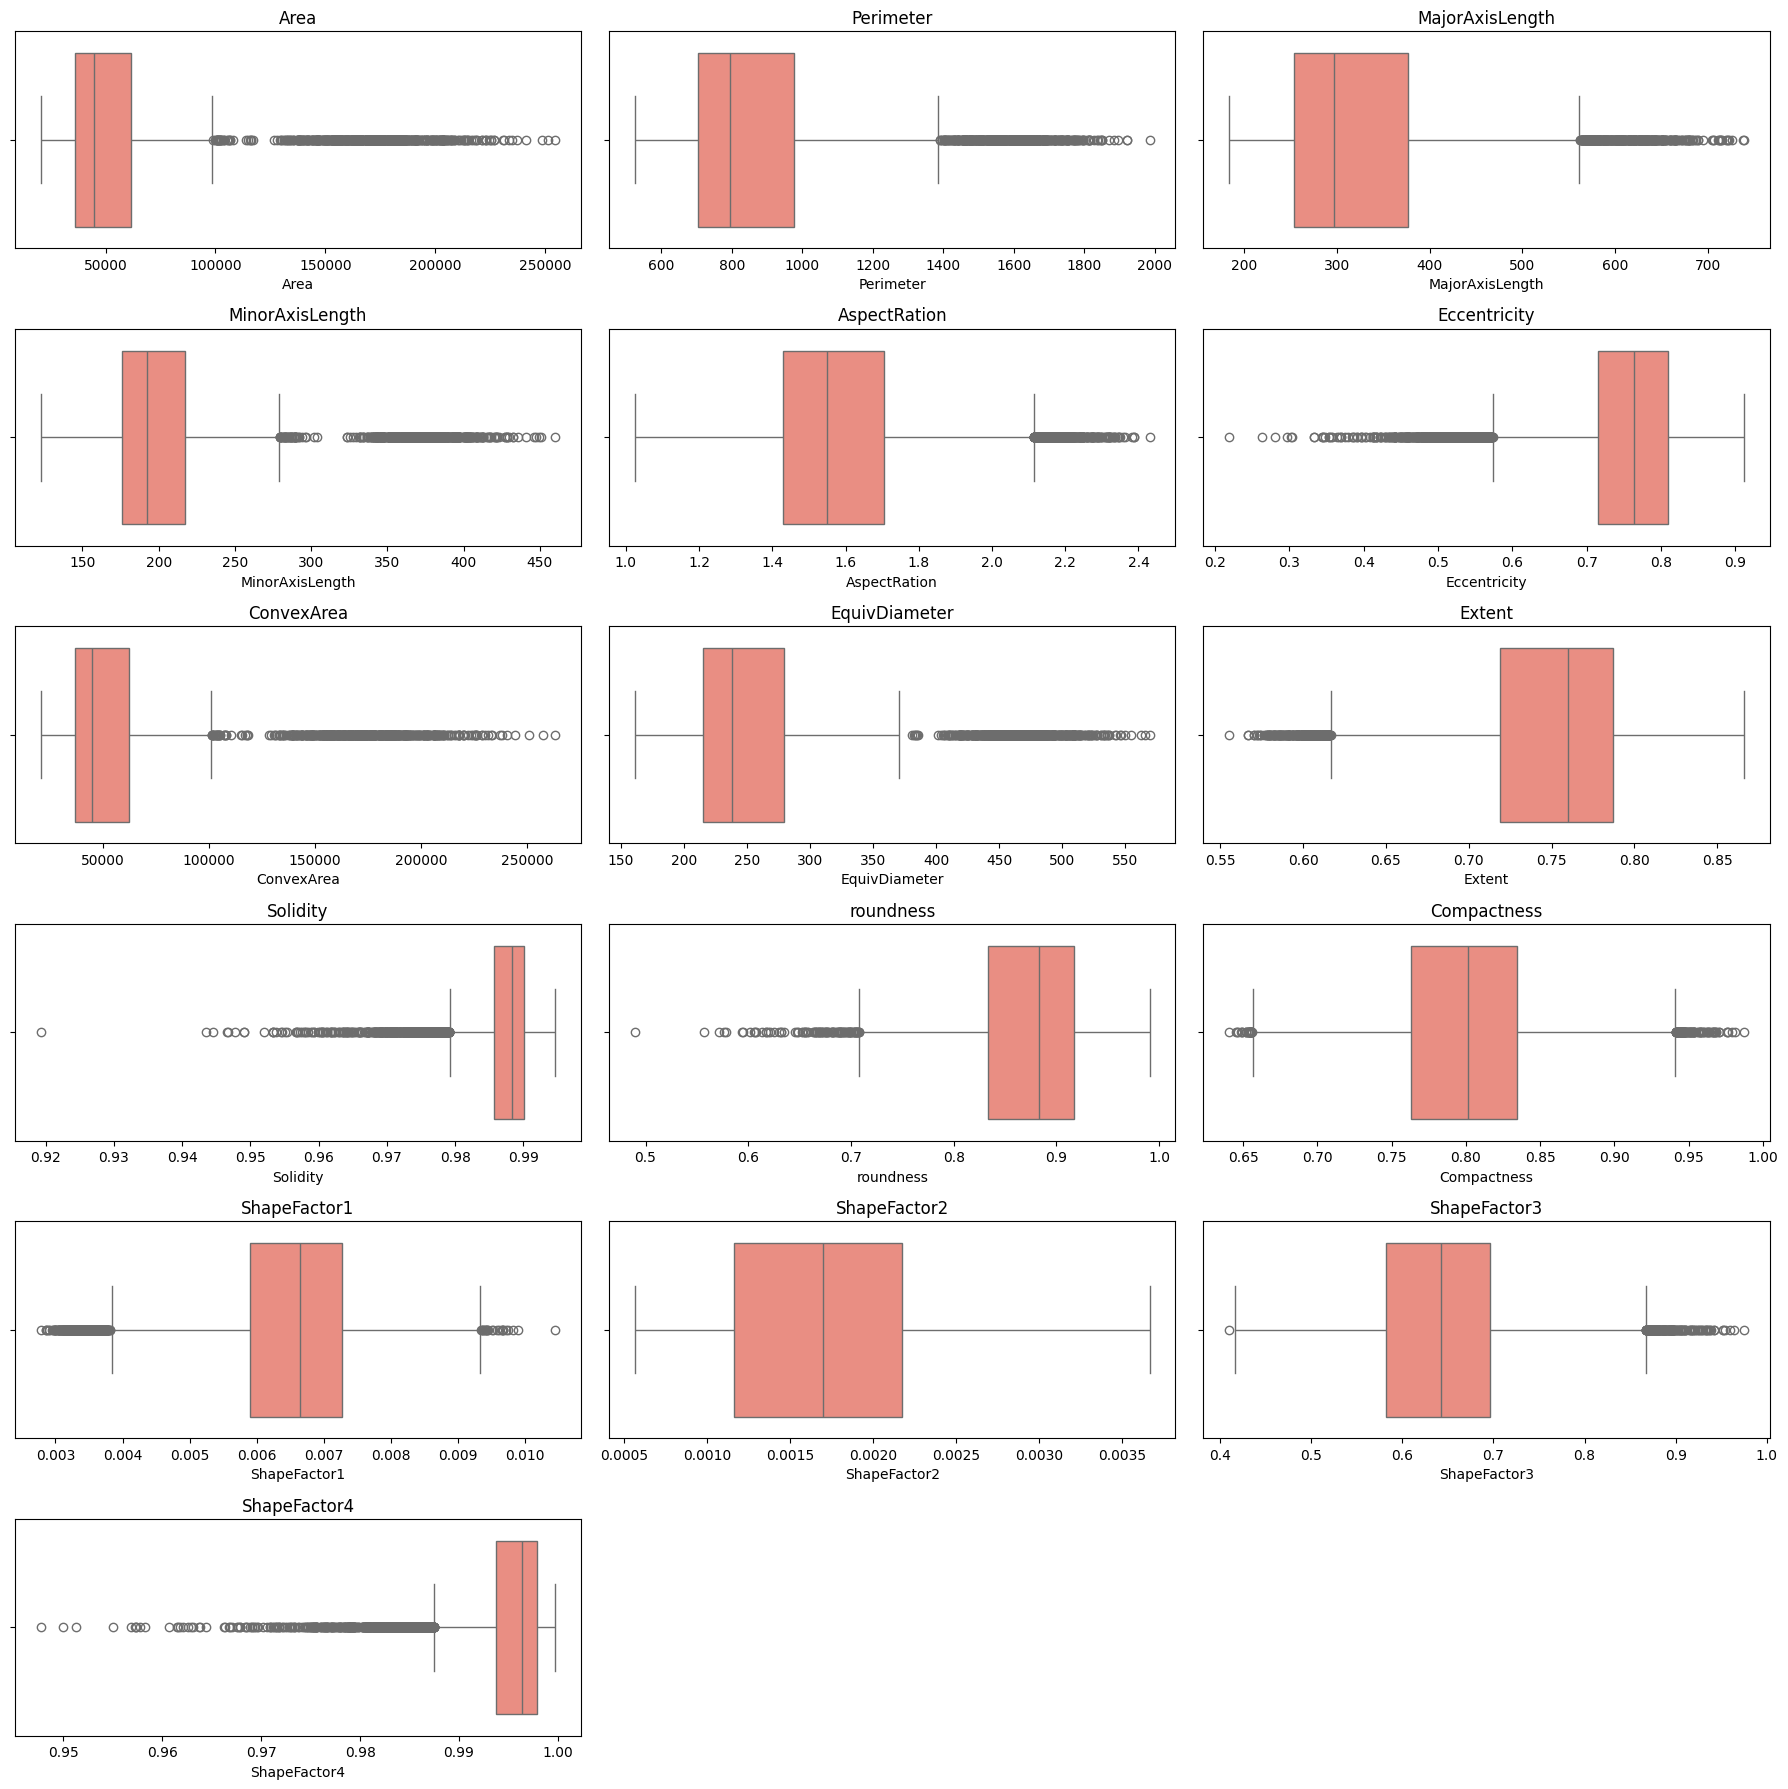

In [10]:
total = len(df.select_dtypes(include=['number']).columns)
cols =  3
rows = int(np.ceil(total/cols))

fig,axes = plt.subplots(rows,cols,figsize=(6*cols,3*rows))
axes = axes.flatten()

for i,col in enumerate(df.select_dtypes(include=['number'])):
    sns.boxplot(df[col],ax=axes[i],orient='h',color='salmon')
    axes[i].set_title(col)

for j in range(i+1,len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

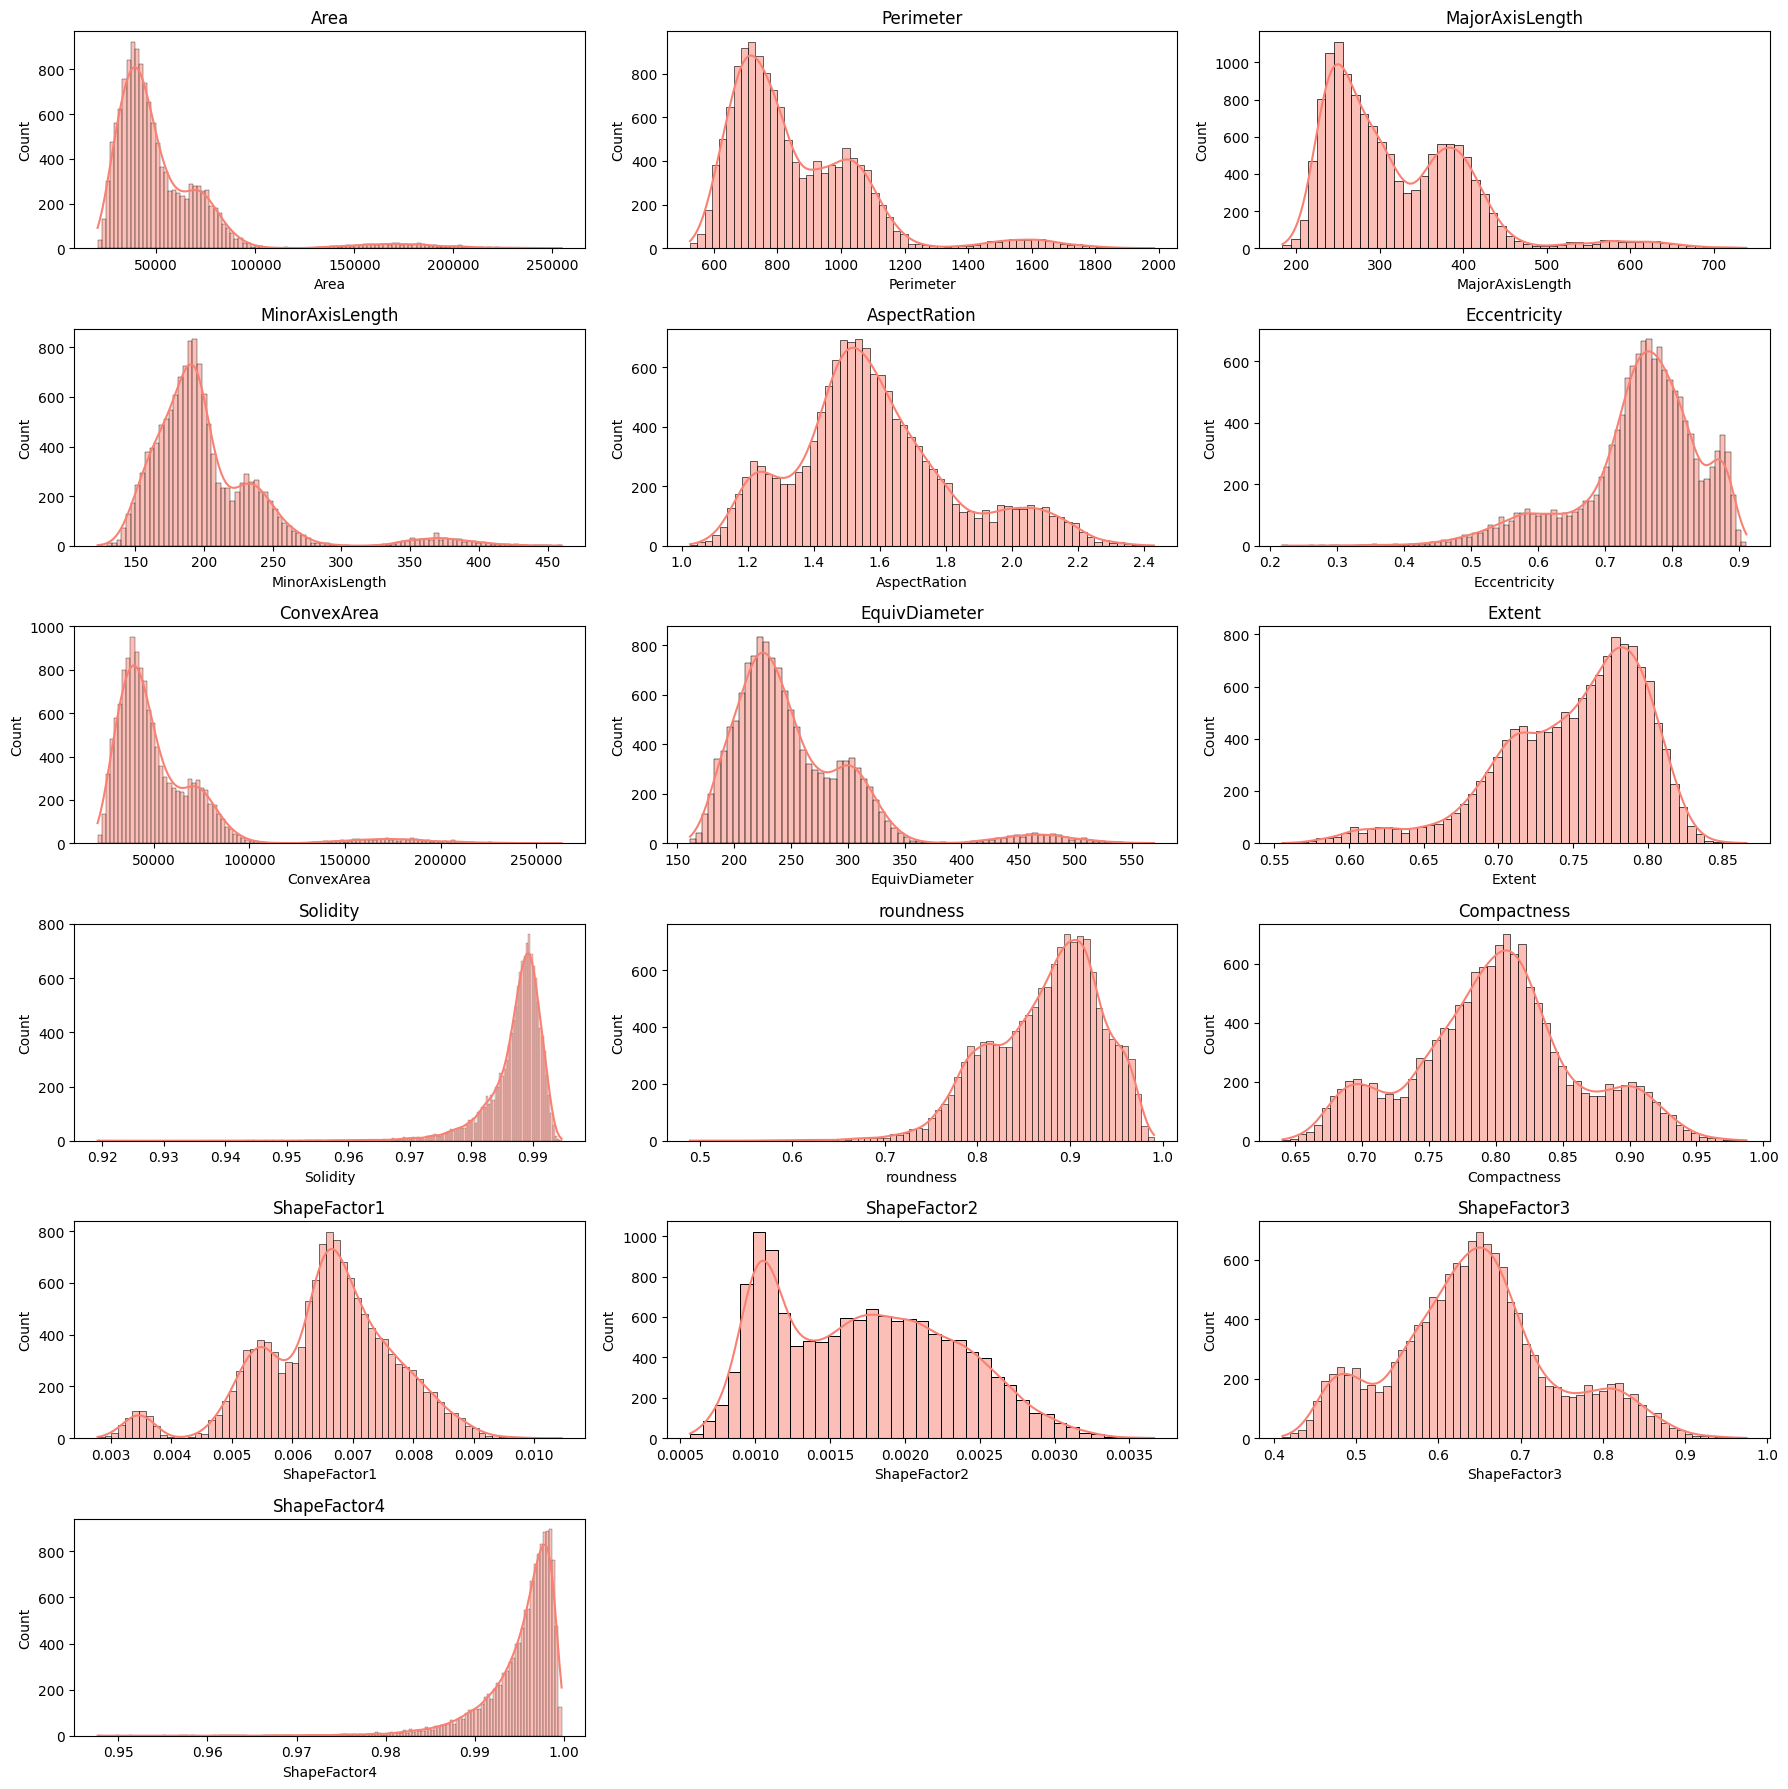

In [11]:
total = len(df.select_dtypes(include=['number']).columns)
cols =  3
rows = int(np.ceil(total/cols))

fig,axes = plt.subplots(rows,cols,figsize=(6*cols,3*rows))
axes = axes.flatten()

for i,col in enumerate(df.select_dtypes(include=['number'])):
    sns.histplot(df[col],ax=axes[i],color='salmon',kde=True)
    axes[i].set_title(col)

for j in range(i+1,len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

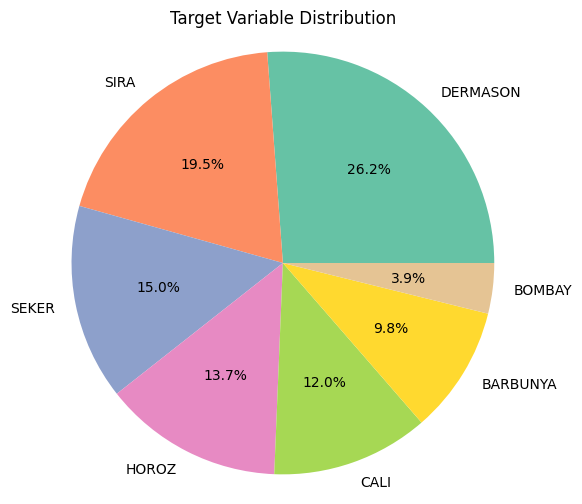

In [12]:
# Target Variable Analysis
class_counts = df['Class'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%',colors = sns.color_palette("Set2"))
plt.title("Target Variable Distribution")
plt.axis('equal')
plt.show()


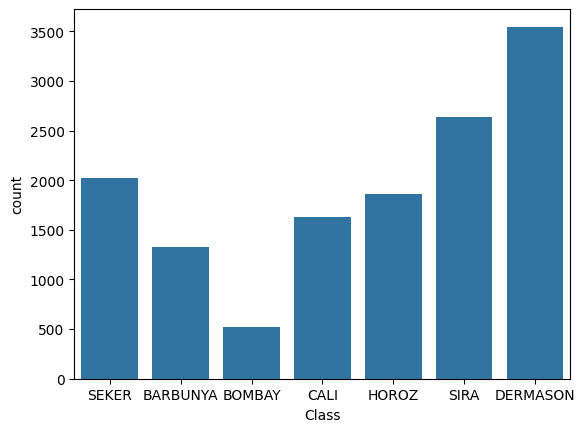

In [13]:
sns.countplot(x='Class', data=df)
plt.show()

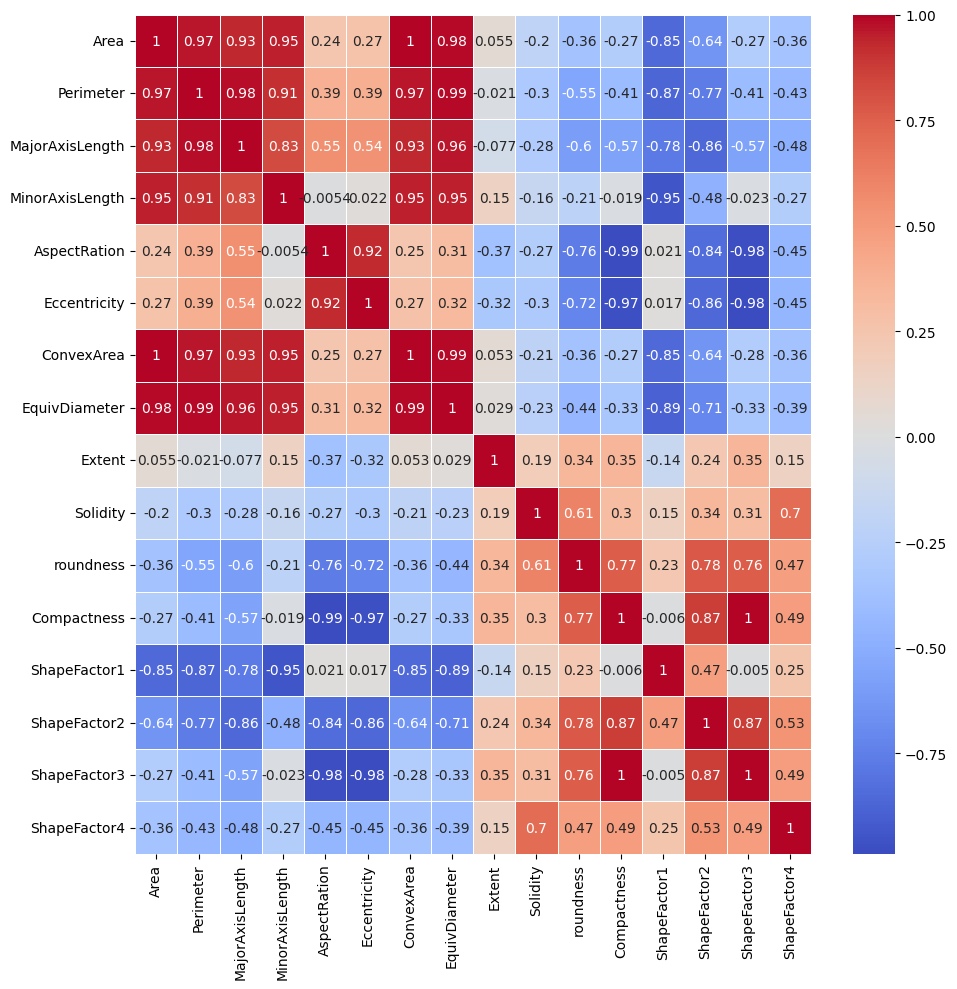

In [14]:
corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,linewidths=0.5,cmap='coolwarm')
plt.tight_layout()
plt.show()

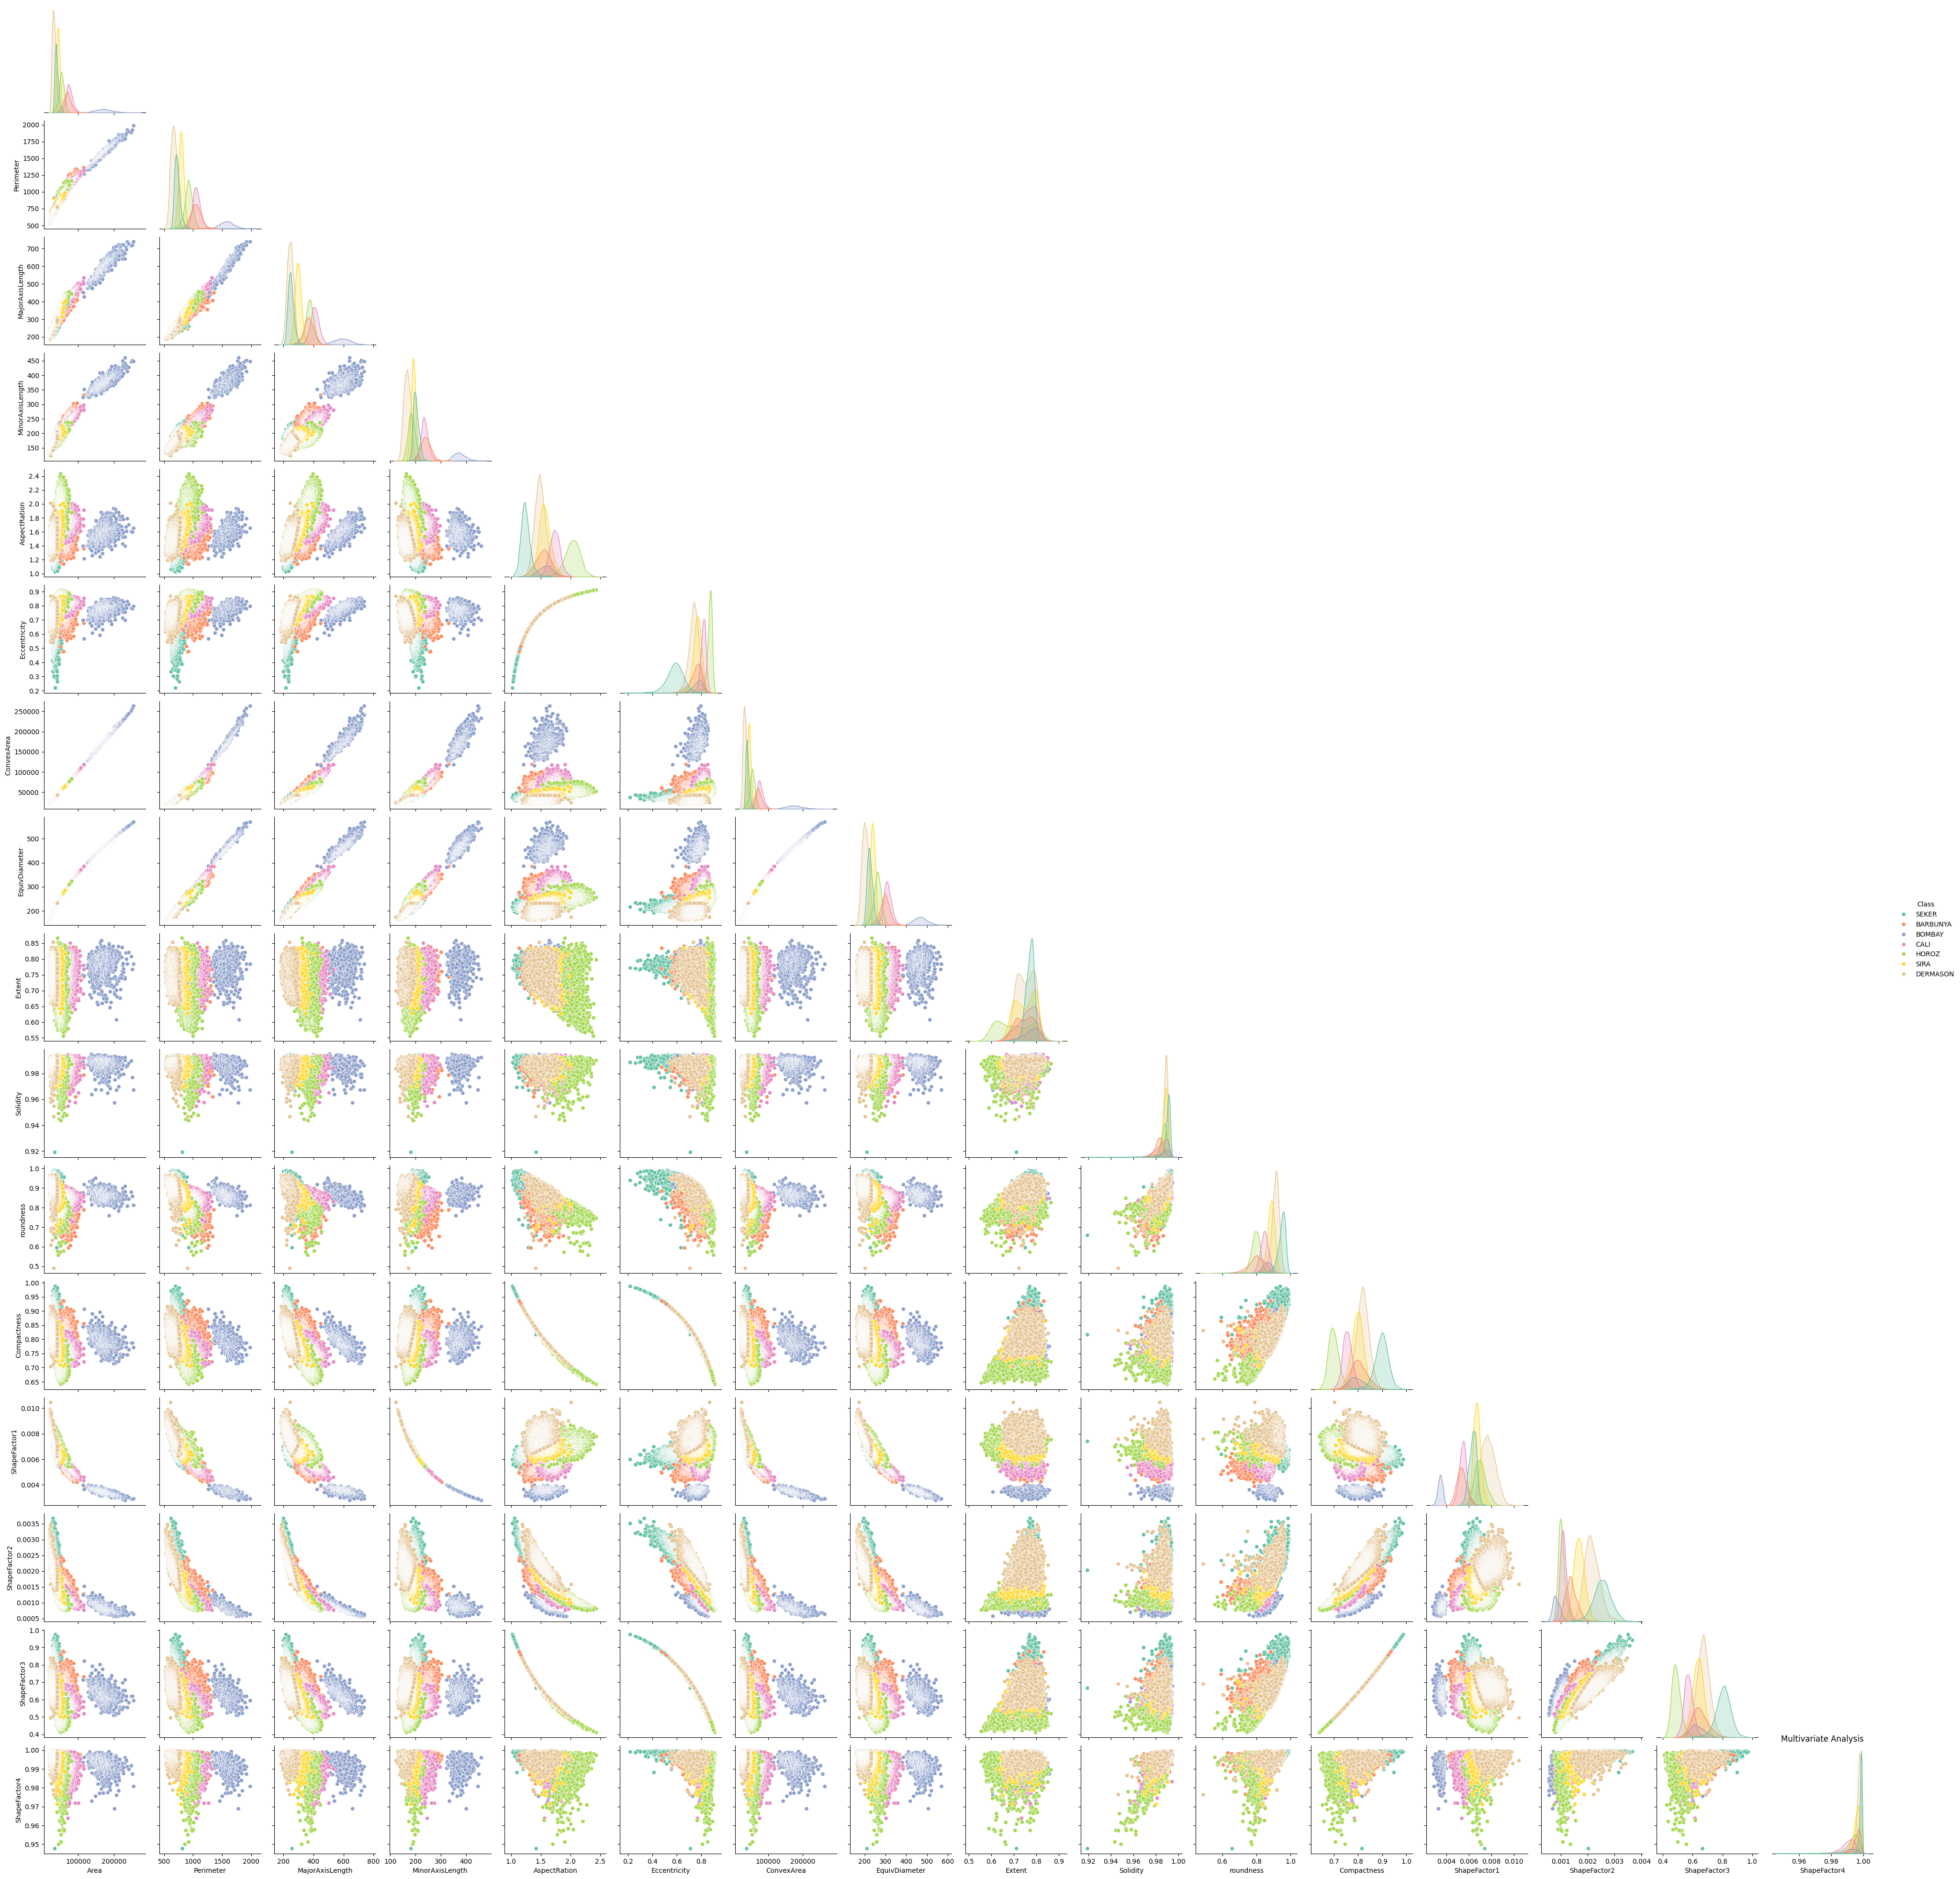

In [15]:
# Multivariate analysis
sns.pairplot(df,hue='Class',diag_kind='auto',palette='Set2',corner=True)
plt.title('Multivariate Analysis')
plt.show()


# Data Treatment (Outliner and skewness Treatment)

In [16]:
for i in df.select_dtypes(include=['number']):
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    IQR = Q3-Q1
    lower_bound = Q1-1.5 *IQR
    upper_bound= Q3+1.5*IQR
    outlier = df[(df[i]<lower_bound)|(df[i]>upper_bound)]

    outlier_count = outlier.shape[0]  
    df[i] = df[i].clip(lower=lower_bound, upper=upper_bound) # Clipping 
    print(f"Feature: {i}") 
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {outlier_count}")
    print("-" * 50)


Feature: Area
Lower Bound: -1366.75, Upper Bound: 99031.25
Number of Outliers: 551
--------------------------------------------------
Feature: Perimeter
Lower Bound: 292.35524999999996, Upper Bound: 1388.0212500000002
Number of Outliers: 500
--------------------------------------------------
Feature: MajorAxisLength
Lower Bound: 68.24828275000004, Upper Bound: 561.15101235
Number of Outliers: 379
--------------------------------------------------
Feature: MinorAxisLength
Lower Bound: 113.847787575, Upper Bound: 279.283972975
Number of Outliers: 567
--------------------------------------------------
Feature: AspectRation
Lower Bound: 1.0207802775000006, Upper Bound: 2.1137970974999996
Number of Outliers: 485
--------------------------------------------------
Feature: Eccentricity
Lower Bound: 0.5733524675, Upper Bound: 0.9514627834999999
Number of Outliers: 833
--------------------------------------------------
Feature: ConvexArea
Lower Bound: -1857.5, Upper Bound: 100890.5
Number of Ou

In [17]:
skew = df.select_dtypes(include=['number']).skew()
print(skew)
highly_skewed = [col for col in skew.index if abs(skew[col])>1]

print("Highly Skewed Variables",highly_skewed)

Area               0.962041
Perimeter          0.966336
MajorAxisLength    0.978854
MinorAxisLength    0.729091
AspectRation       0.470467
Eccentricity      -0.614243
ConvexArea         0.969221
EquivDiameter      0.839585
Extent            -0.782121
Solidity          -0.844469
roundness         -0.497000
Compactness        0.017507
ShapeFactor1      -0.332581
ShapeFactor2       0.294332
ShapeFactor3       0.191359
ShapeFactor4      -1.039942
dtype: float64
Highly Skewed Variables ['ShapeFactor4']


In [18]:
# Applying log transformation 
df[highly_skewed] = np.log1p(df[highly_skewed])
print(df[highly_skewed].skew())

ShapeFactor4   -1.042574
dtype: float64


In [19]:
# Label Encoding
le = LabelEncoder()
df['Class']=le.fit_transform(df['Class'])

In [20]:
# Feature Selection
x = df.drop(columns='Class')
y = df['Class']

In [21]:
# Train Test Split
x_train ,x_test , y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=7,stratify=y)
print('Train Size',x_train.shape[0])

Train Size 9480


In [22]:
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []

for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(x_train_scaled, y_train)
        pred = model.predict(x_test_scaled)
    else:
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='weighted')
    results.append([name, acc, f1])

pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score']).sort_values(by='Accuracy',ascending=False)

Model  Accuracy  F1 Score
0  Logistic Regression  0.927640  0.927661
7    Gradient Boosting  0.925671  0.925684
2        Random Forest  0.925178  0.925123
1        Decision Tree  0.897613  0.897531
6             AdaBoost  0.837312  0.822661
5          Naive Bayes  0.764706  0.761904
3                  KNN  0.716220  0.713351
4                  SVM  0.631553  0.594852

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=7)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts().to_dict())


Before SMOTE: {3: 2482, 6: 1845, 5: 1419, 4: 1302, 2: 1141, 0: 925, 1: 366}
After SMOTE: {3: 2482, 6: 2482, 2: 2482, 5: 2482, 4: 2482, 0: 2482, 1: 2482}


In [25]:
gradient = GradientBoostingClassifier(random_state=7)
gradient.fit(x_train_resampled, y_train_resampled)
pred_test = gradient.predict(x_test)

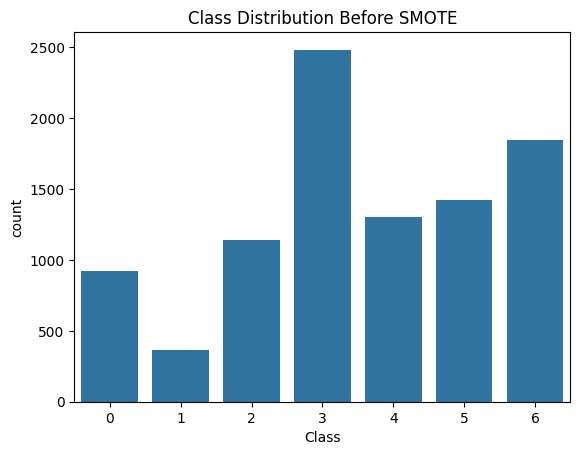

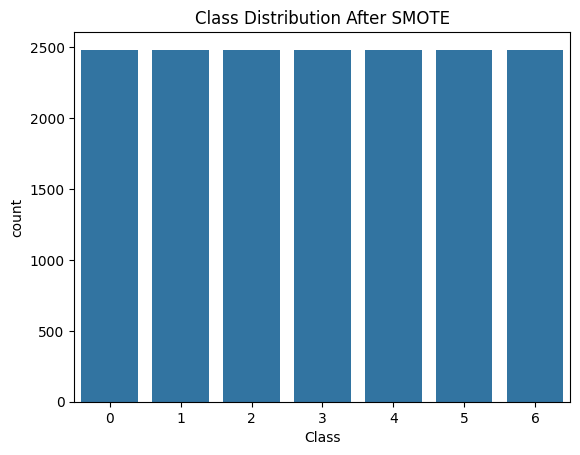

In [26]:
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.show()

sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

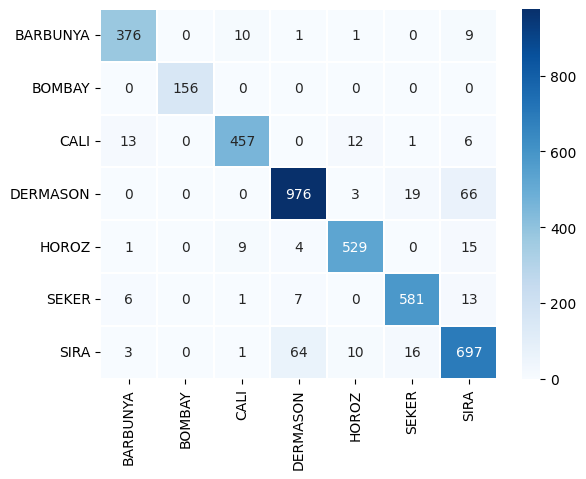

In [27]:
gradient_cm = confusion_matrix(y_test,pred_test)
sns.heatmap(gradient_cm,annot=True,fmt='d',linewidths=.05,xticklabels=le.classes_,yticklabels=le.classes_,cmap='Blues')
plt.show()

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(GradientBoostingClassifier(), x_train, y_train, cv=5, scoring='f1_weighted')
print("CV F1 Score:", scores.mean())

CV F1 Score: 0.9220612729176935


In [31]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [ 0.1, 0.2]
}

grid = RandomizedSearchCV(GradientBoostingClassifier(random_state=7), params, cv=2, scoring='f1_weighted',n_iter=3,verbose=1,n_jobs=-1)
grid.fit(x_train_resampled, y_train_resampled)
print("Best Params:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best Params: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best F1 Score: 0.9506264207386905


              precision    recall  f1-score   support

    BARBUNYA       0.94      0.94      0.94       397
      BOMBAY       1.00      0.99      1.00       156
        CALI       0.96      0.93      0.95       489
    DERMASON       0.92      0.91      0.92      1064
       HOROZ       0.95      0.95      0.95       558
       SEKER       0.94      0.96      0.95       608
        SIRA       0.87      0.88      0.87       791

    accuracy                           0.93      4063
   macro avg       0.94      0.94      0.94      4063
weighted avg       0.93      0.93      0.93      4063



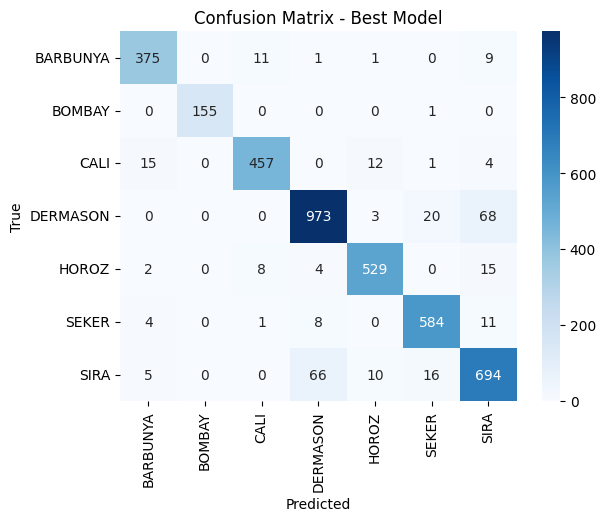

In [32]:
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred, target_names=le.classes_))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

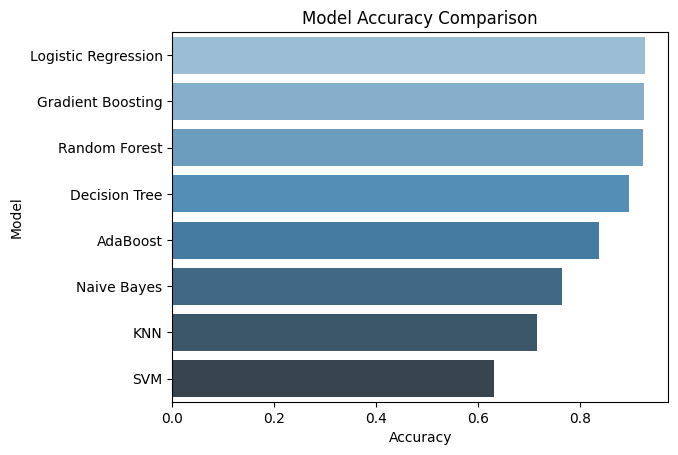

In [33]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score']).sort_values(by='Accuracy',ascending=False)
sns.barplot(data=results_df, x='Accuracy', y='Model', palette='Blues_d')
plt.title("Model Accuracy Comparison")
plt.show()

In [34]:
train_pred = gradient.predict(x_train)
print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, pred_test))

Train Accuracy: 0.955379746835443
Test Accuracy: 0.9283780457789811


# Best model with no overfitting issue GradientBoost -> 92 Test accuracy 94 train

In [35]:
import joblib
joblib.dump(gradient, './models/gradient.pkl')

['./models/gradient.pkl']

In [36]:
le.classes_

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)